In [138]:
import sys
sys.path.append('../')

import controller
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [139]:
np.random.seed(149)

ci = controller.Car_Interface()

ci.set_gear(ci.FORWARD)

def apply_alternating_controls(ci, num, time_per):

    commands = []

    '''
    commands should be a list of tuples (cmd_type, amt) where
    cmd_type is either 'accelerate' or 'brake' and amt is a
    random number between 0 and 1 that denotes how much the
    corresponding pedal was depressed.
    
    In total there should be num commands and each should
    be executed for time_per seconds.  The car interface log
    will be used later for accessing the data, so make sure
    to actually execute the commands on the vehicle.
    (see controller.py)
    '''
    
    #CODE HERE
    for i in range(num):
        pedal = int(np.random.uniform(0,2))
        amount = np.random.uniform()
        
        if pedal == 0:
            ci.apply_control_for_time(ci.ACCELERATOR, amount, time_per)
            commands.append(("brake",amount))
        else:
            ci.apply_control_for_time(ci.BRAKE, amount, time_per)
            commands.append(('accelerate',amount))
    return commands


N = 20
TIME_PER = 50
commands = apply_alternating_controls(ci, num = N, time_per = TIME_PER)

for i in range(10):
    print(commands[i][0], f"{commands[i][1] * 100:.2f}%")
    


accelerate 97.97%
accelerate 83.81%
accelerate 86.10%
brake 44.12%
accelerate 6.98%
brake 90.20%
brake 91.14%
brake 16.78%
accelerate 97.06%
accelerate 89.06%


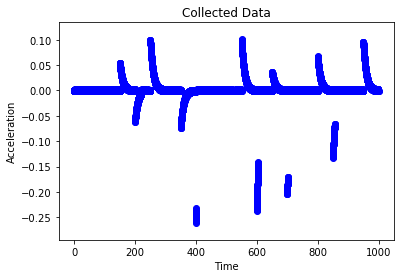

Actual Coefficients:
c1: 5
c2: 5
c3: 5
c4: 5
c2: 0.13218328942760138
c3: -0.13617844082678143


IndexError: index 3 is out of bounds for axis 0 with size 3

In [178]:

vel_log = ci.log["velocity"]
acc_log = ci.log["acceleration"]
time_log = ci.log["time"]
NUM_READINGS = len(time_log)
NUM_READINGS_PER = int(NUM_READINGS / N)
#filtered times
filt_times = []
filt_inps = []
filt_outs = []

all_times = []
all_inps = []
all_outs = []


def filter(cmd,vel,acc,t):
    if abs(acc) > 0.01:
        filt_inps.append([cmd[1],vel,t])
        filt_outs.append(acc)
        filt_times.append(t)
        

for i in range(NUM_READINGS):
    cmd = commands[int(i / NUM_READINGS_PER)]
    vel = vel_log[i]
    acc = acc_log[i]
    t = time_log[i]

    if (cmd[0] == 'accelerate'):
        '''
        inp = ? should be a list of length 3 corresponding
        to the three input variable in the linear equation
        for determining acceleration
        '''
        #input position velocity * c3 + accel + brake
        inp = [cmd[1],0,vel]

        
    elif(cmd[0] == 'brake'):
        '''
        inp = ? remember to order input variables exactly
        as done in the previous statement
        '''
        inp = [0,cmd[1],vel]

#    filter(cmd[1],0, vel)
    all_inps.append(inp)
    all_outs.append(acc)
    all_times.append(t)
    if abs(acc) > 0.01:
        filt_inps.append(inp)
        filt_outs.append(acc)
        filt_times.append(t)
        


    '''
    At first you can leave this code section blank.
    Once you run Linear Regression on the basic inputs
    and outputs you will notice the regression struggles to
    accurately model data.  Here you will populate the filtered
    lists (filt_inps, filt_outs, filt_times) similar to how
    the all lists are populate above, but censoring out certain
    (input, output) data points that are undesirable.
    '''
    #LinearRegression()
#X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
#y = np.dot(X, np.array([1, 2])) + 3
#print(all_inps)
#reg = LinearRegression().fit(all_inps, all_outs)
#coefficients = reg.coef_
#print((coefficients))



plt.title("Collected Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(all_times, all_outs, color = 'b')
plt.show()

print(f"Actual Coefficients:")
'''
Fill in the blanks in the next 4 lines with
reasonable names for the 4 coefficients and
in the curly braces put the corresponding
variable name to display it.  The variables
should attributes of the car interface object
that correspond to those in the linear
equation presented in class.
'''

c1,c2,c3,c4 = 5,5,5,5

print(f"c1: {coefficients[0]}")
print(f"c2: {coefficients[1]}")
print(f"c3: {coefficients[2]}")
print(f"c4: {b}")

Model Fit 0.6078931895764543
Model Predictions:
c1: -0.007167981801826563
c2: 0.13218328942760138
c3: -0.13617844082678143
c4: 0.0032651133754939016
___________________________________________


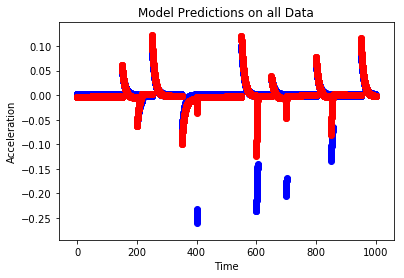

In [180]:
model = LinearRegression()


'''
First fit the model with the generated data.
Then assign fit_score to sklearn LinearRegression
score function.  Finally retrieve the learned coefficients.
There should be 4, 3 linear dependencies and one constant.
(See the coef_ and intercept_ attributes in the LinearRegression
documentation)
'''

#CODE HERE

reg = model.fit(all_inps, all_outs)
coefficients = reg.coef_
fit_score = reg.score(all_inps, all_outs)
b = reg.intercept_

print(f"Model Fit {fit_score}")
print(f"Model Predictions:")
'''
Fill in the blanks in the next 4 lines with
reasonable names for the 4 coefficients and
in the curly braces put the corresponding
variable name to display it
'''
c1,c2,c3,c4 = 5,5,5,5

print(f"c1: {coefficients[0]}")
print(f"c2: {coefficients[1]}")
print(f"c3: {coefficients[2]}")
print(f"c4: {b}")


print("___________________________________________")

plt.clf()
plt.title("Model Predictions on all Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(all_times, all_outs, color = 'b')
plt.scatter(all_times, model.predict(all_inps), color = 'r')
plt.show()

Model Fit 0.9996350621668143
c1: -0.25002428422880085
c2: 0.1001116660577628
c3: -0.1099227557722343
c4: 0.009893222471941684


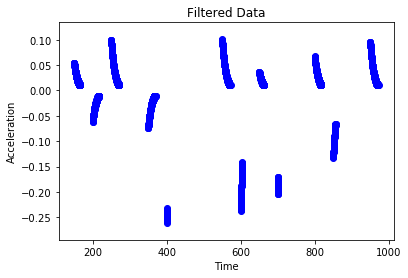

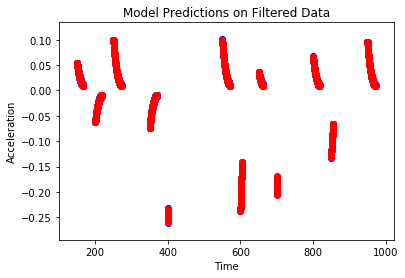

In [181]:
'''
First fit the model with the filtered generated data.
Then assign fit_score to sklearn LinearRegression
score function.  Finally retrieve the learned coefficients.
There should be 4, 3 linear dependencies and one constant.
Code should be similar to the previous section but now using
the filtered data.
'''


reg = model.fit(filt_inps,filt_outs)
coefficients = reg.coef_
fit_score = reg.score(filt_inps, filt_outs)
b=reg.intercept_
print(f"Model Fit {fit_score}")
'''
Fill in the blanks as in the previous section
'''
c1,c2,c3,c4 = 5,5,5,5

print(f"c1: {coefficients[0]}")
print(f"c2: {coefficients[1]}")
print(f"c3: {coefficients[2]}")
print(f"c4: {b}")

plt.clf()
plt.title("Filtered Data")
plt.scatter(filt_times, filt_outs, color = 'b')
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.show()

plt.clf()
plt.title("Model Predictions on Filtered Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(filt_times, filt_outs, color = 'b')
plt.scatter(filt_times, model.predict(filt_inps), color = 'r')
plt.show()